In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../datasets/wine.csv') 

In [5]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Independent and dependent feature

In [6]:
y = df['Wine']
 #Load X Variables into a Pandas Dataframe with columns 
X = df.drop(columns = ['Wine'])
#y is dependent variable and X is independent variable.

## Split data into train and test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.3)  

## Using Pearson Correlation

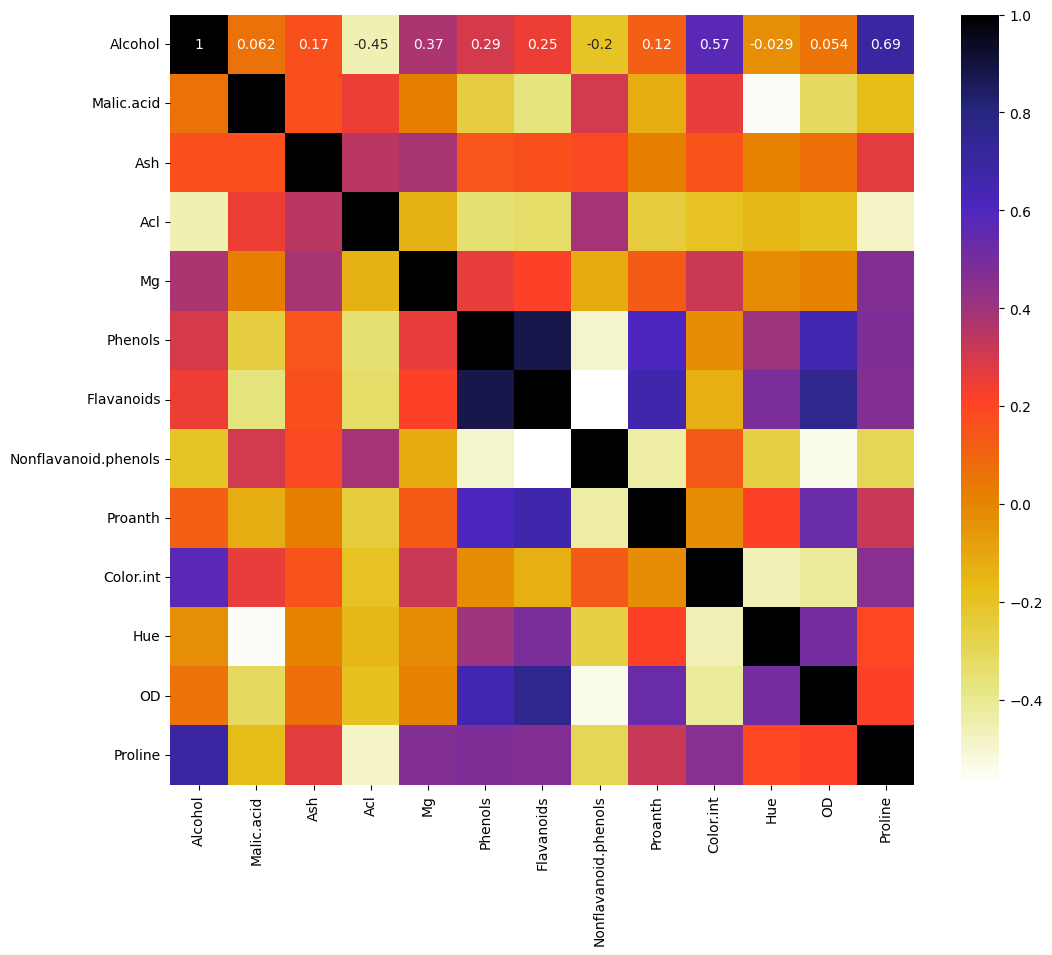

In [8]:
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

## Finding correlated features, above a threshold

In [9]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]                  
                col_corr.add(colname)
    return col_corr     

## Getting correlated features

In [10]:
corr_features = correlation(X_train, 0.7)
corr_features
# Most people set the threshold as 0.85.

{'Flavanoids', 'OD'}

## Remove the correlated features

In [11]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Nonflavanoid.phenols,Proanth,Color.int,Hue,Proline
88,11.64,2.06,2.46,21.6,84,1.95,0.48,1.35,2.800000,1.00,680
159,13.48,1.67,2.64,22.5,89,2.60,0.52,2.29,11.750000,0.57,620
11,14.12,1.48,2.32,16.8,95,2.20,0.26,1.57,5.000000,1.17,1280
74,11.96,1.09,2.30,21.0,101,3.38,0.13,1.65,3.210000,0.99,886
158,14.34,1.68,2.70,25.0,98,2.80,0.53,2.70,13.000000,0.57,660
149,13.08,3.90,2.36,21.5,113,1.41,0.34,1.14,9.400000,0.57,550
99,12.29,3.17,2.21,18.0,88,2.85,0.45,2.81,2.300000,1.42,406
96,11.81,2.12,2.74,21.5,134,1.60,0.14,1.56,2.500000,0.95,625
90,12.08,1.83,2.32,18.5,81,1.60,0.52,1.64,2.400000,1.08,480
95,12.47,1.52,2.20,19.0,162,2.50,0.32,3.28,2.600000,1.16,937


## Perform chi2 test
Chi-square is used to find F-score and p-values for all features. So in this case the first array is for F score and the second array is for p- values. Now, what is the importance of these two values? And the more the value of the F score the more important the feature is and the lesser the value of the p-value the more important will be the feature.

In [12]:
from sklearn.feature_selection import chi2
#Calculating Fscore and p value
f_p_values=chi2(X_train,y_train)
f_p_values

(array([3.89207321e+00, 1.83015392e+01, 5.19931016e-01, 2.08304114e+01,
        4.85455374e+01, 1.05269647e+01, 3.96531076e+01, 1.42158202e+00,
        6.66097455e+00, 6.60272683e+01, 2.69096383e+00, 1.34426533e+01,
        1.23370328e+04]),
 array([1.42839079e-01, 1.06138089e-04, 7.71078181e-01, 2.99732356e-05,
        2.87389237e-11, 5.17724433e-03, 2.45152930e-09, 4.91255455e-01,
        3.57756683e-02, 4.59579717e-15, 2.60414180e-01, 1.20493863e-03,
        0.00000000e+00]))

## Representing in list form
Ascending order in terms of P-Values

In [13]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_index(ascending=True) 

Acl                     2.997324e-05
Alcohol                 1.428391e-01
Ash                     7.710782e-01
Color.int               4.595797e-15
Flavanoids              2.451529e-09
Hue                     2.604142e-01
Malic.acid              1.061381e-04
Mg                      2.873892e-11
Nonflavanoid.phenols    4.912555e-01
OD                      1.204939e-03
Phenols                 5.177244e-03
Proanth                 3.577567e-02
Proline                 0.000000e+00
dtype: float64

## Mutual information gain
Importing mutual information gain. mutual_info_classif is a library that is present in feature_selection. It is the property of mutual information gain that the value you will get will never be negative. The higher the value the more important that feature will be or you can say that the dependency of that independent feature will be more on the dependent feature.

In [14]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.49287832, 0.34533057, 0.08466107, 0.18533255, 0.22314829,
       0.41813858, 0.71271499, 0.09640146, 0.3155153 , 0.5523711 ,
       0.334763  , 0.42426053, 0.56850518])

## Reprsenting Gain in List Form

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.712715
Proline                 0.568505
Color.int               0.552371
Alcohol                 0.492878
OD                      0.424261
Phenols                 0.418139
Malic.acid              0.345331
Hue                     0.334763
Proanth                 0.315515
Mg                      0.223148
Acl                     0.185333
Nonflavanoid.phenols    0.096401
Ash                     0.084661
dtype: float64

## Gain In the form of plot

<Axes: >

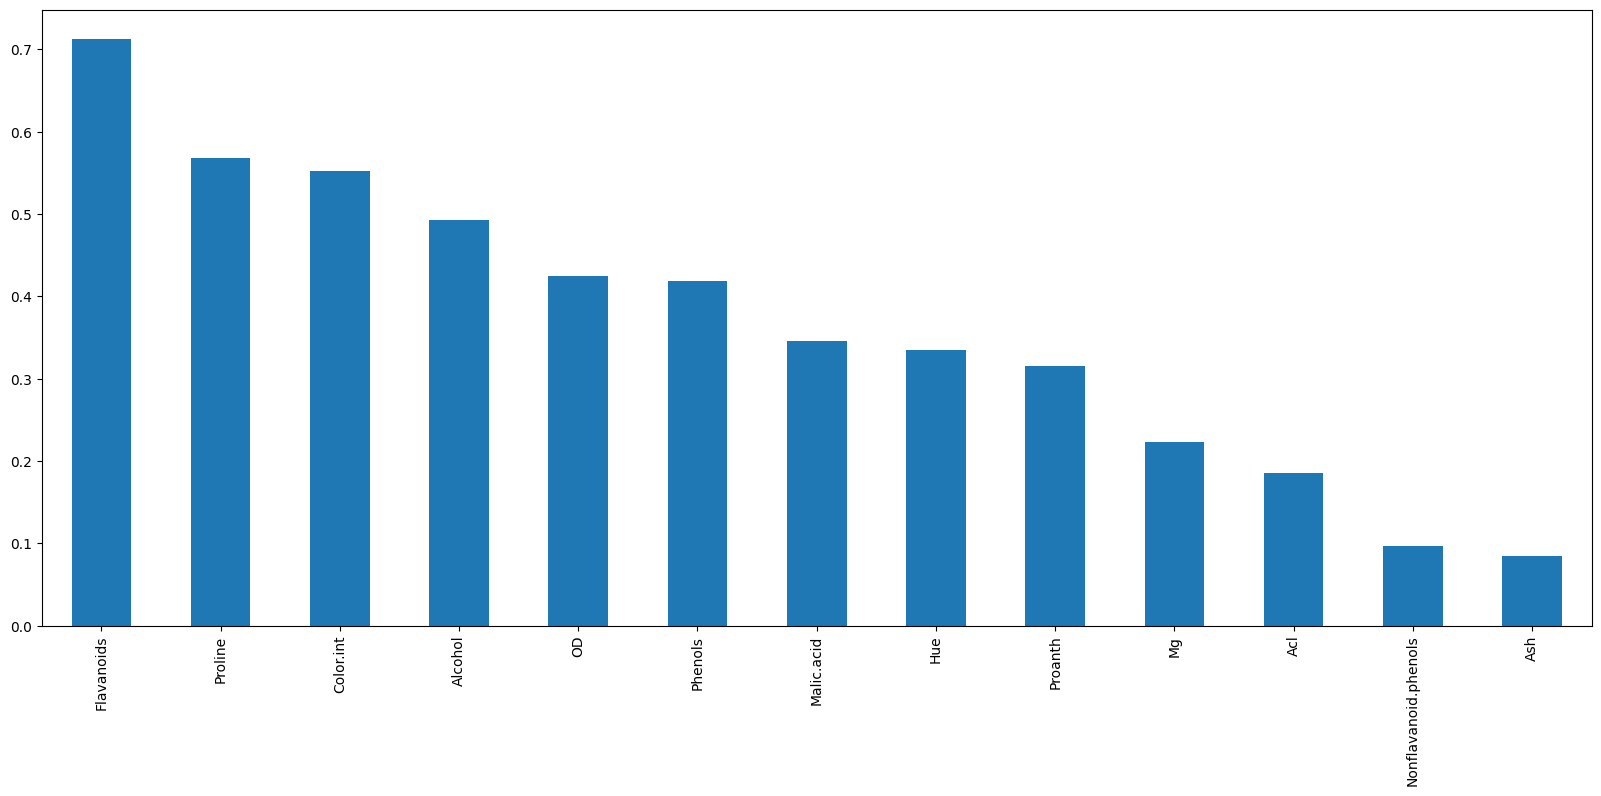

In [16]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

## Selecting 5 best features

In [17]:
from sklearn.feature_selection import SelectKBest
#No we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Alcohol', 'Flavanoids', 'Color.int', 'OD', 'Proline'], dtype='object')

## Now you can create the model